<h1>什么是笔记？</h1>

在笔记中可以编写和执行 `Python 代码`，将在个人电脑端的 **数据分析工作搬到浏览器** 中，同时： 
- 无需部署环境，并使用比个人电脑配置更强的服务器资源
- 数据查询和笔记打通，无需多次周转数据
- 使用 Pandas、Matplotlib、TenSorFlow 完成数据分析和机器学习  
- 项目协作：同一个项目中包含数据探索、数据开发、流程化建模

无论您是一名 **Python 初学者**、**数据分析师** 还是 **数据科学家**，笔记都能够帮助您更轻松地完成数据分析工作。您可以阅读 **数据平台帮助文档** 了解详情，或查看下面的入门指南！

## 使用入门

您正在阅读的文档并非静态网页，而是一个允许您 **编写和执行代码** 的交互式环境，称为 **笔记**。

例如，以下 `代码 Cell` 会输出今天的日期，如同在 Python IDE 中操作一样。

In [1]:
import time
today = time.strftime("%Y%m%d", time.localtime())
print(today)

20200605


要执行上述 Cell 中的代码，请点击左侧的运行按钮（快捷键 `Shift+Enter`）。

当然，你可以完成一个简单的计算，比如一辈子大约有多少天

In [2]:
days_in_a_life= 365 * 80

days_in_a_life

29200

一辈子大约有多少小时

> 在同一个笔记中，可以引用变量

In [3]:
hours_in_a_life = 24 * days_in_a_life

hours_in_a_life

700800

您可以将 **可执行代码**、**富文本** 以及 **图像**、**HTML**、**LaTeX** 等内容合入 1 个文档中。

您可以在个人下使用笔记做数据探索，也可以在项目下编辑笔记，与项目成员一起协作。

笔记基于 [Jupyter](https://www.jupyter.org/) 方案实现。

接下来，我们看下在笔记中如何加载结果数据表的数据。


## 获取数据
### 在 Cell 中 使用 SQL 查询
> 支持在 `Cell` 中引用前面 `Cell` 定义的 `变量`

In [4]:
%%bksql 
SELECT status, body_bytes_sent, http_referer, method, URI, dtEventTime
       FROM 591_demo_nginx_access_log
       WHERE thedate={today}
    ORDER BY dtEventTime DESC LIMIT 3

#### 引用查询结果
执行查询语句后，查询结果集支持赋值给自定义变量

In [5]:
result = _

自定义变量 `result` 包含 `dicts`、`DataFrame` 等方法，方便对结果集进行二次处理


In [6]:
for line in result.data:
  print(line)

{'method': 'GET', 'http_referer': '-', 'body_bytes_sent': 185, 'dtEventTime': '2020-06-05 20:40:33', 'URI': '/portal', 'status': 301}
{'method': 'GET', 'http_referer': '-', 'body_bytes_sent': 185, 'dtEventTime': '2020-06-05 20:40:32', 'URI': '/portal', 'status': 301}
{'method': 'GET', 'http_referer': '-', 'body_bytes_sent': 185, 'dtEventTime': '2020-06-05 20:40:32', 'URI': '/portal', 'status': 301}


In [7]:
df = result.DataFrame()
df.columns

Index(['status', 'body_bytes_sent', 'http_referer', 'method', 'URI',
       'dtEventTime'],
      dtype='object')

当然，你可以使用 `单行 SQL 查询`，将查询结果赋值给变量。

In [8]:
uri_group_result = %bksql SELECT URI, COUNT(*) AS cnt FROM 591_demo_nginx_access_log.hdfs WHERE thedate=current_date() GROUP BY URI ORDER BY cnt DESC LIMIT 10 

uri_group_result

### 引用数据探索中查询结果集

数据探索查询任务的查询结果集，可以在笔记中直接使用，方法：datasets('<查询任务名称>')

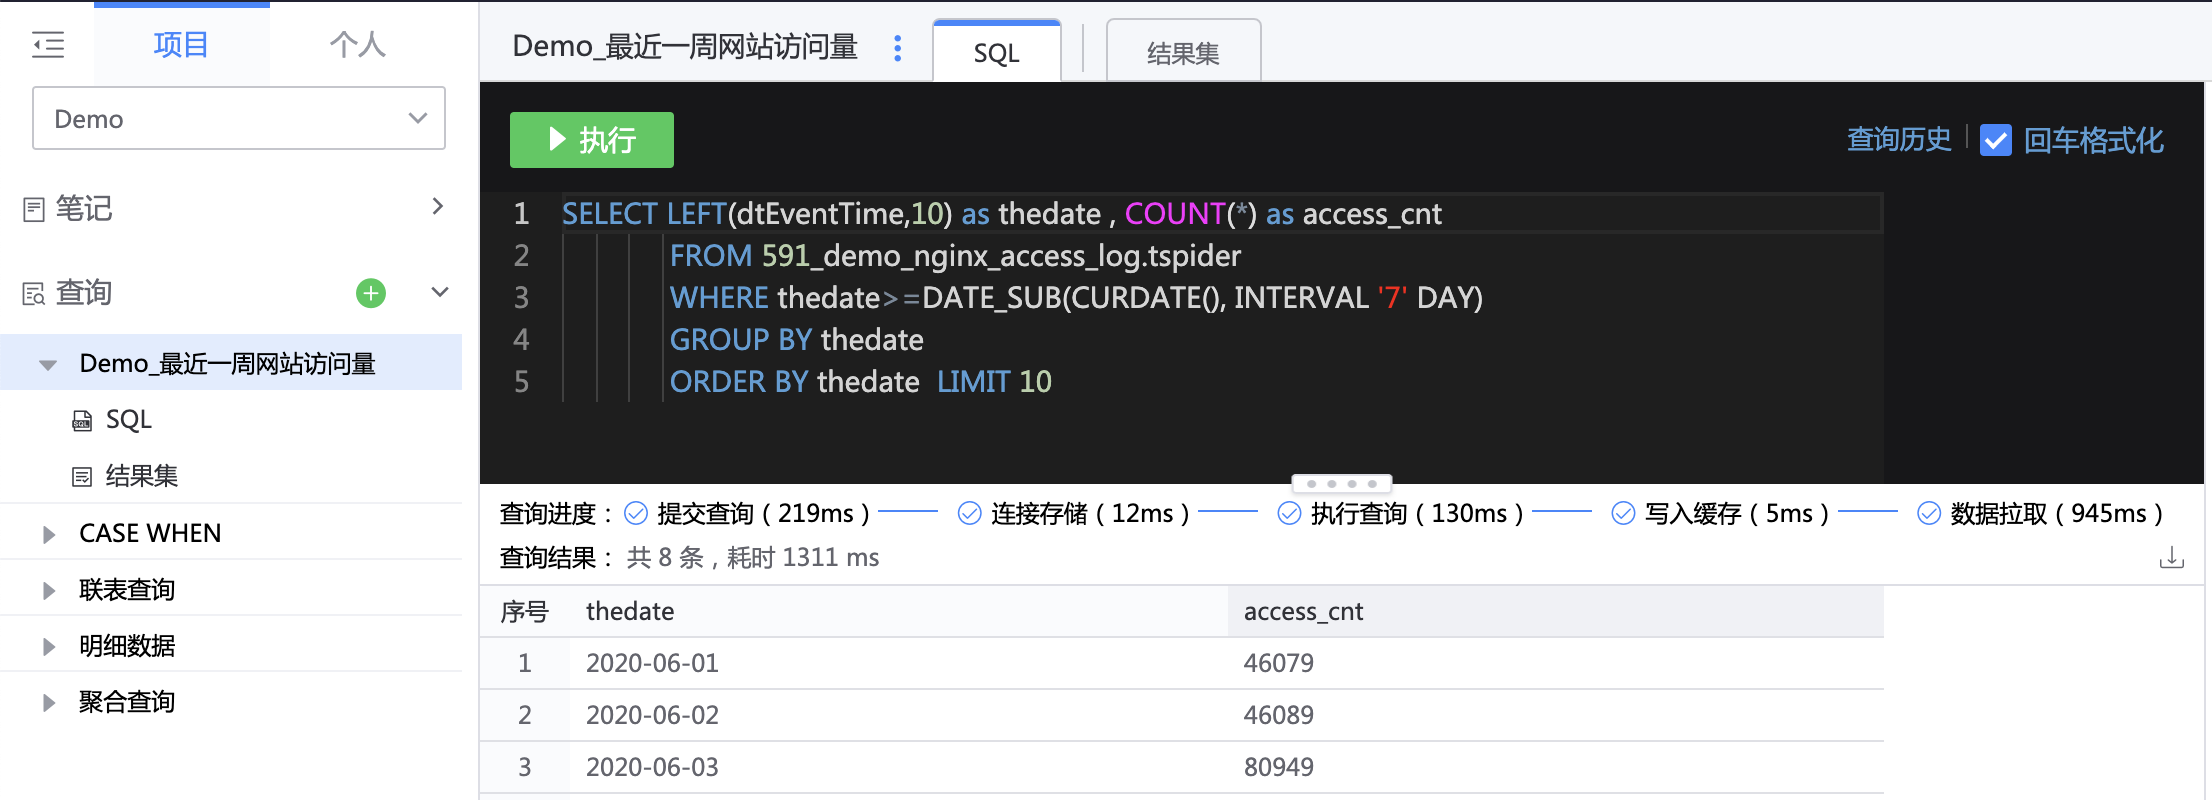

In [9]:
day_pv_last_week = datasets('query_1')

day_pv_last_week

## 数据科学

借助笔记，您可以充分利用常用 Python 库的强大功能来分析和可视化数据。下方的 `代码 Cell` 使用 `NumPy` 生成一些随机数据，并使用 `Matplotlib` 可视化这些数据。要修改代码，只需点击 `Cell`，然后开始修改。

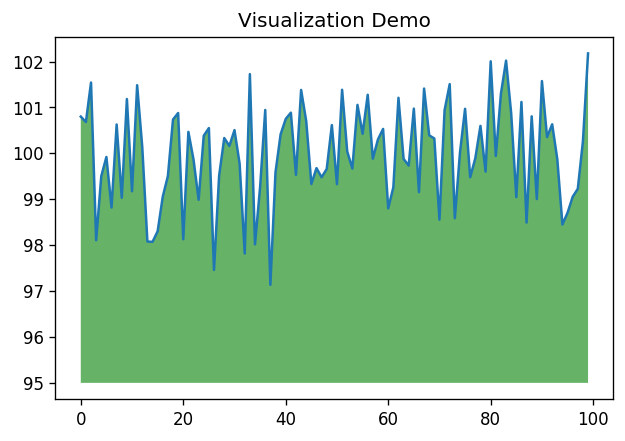

In [10]:
import numpy as np
from matplotlib import pyplot as plt

ys = 100 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 95, where=(ys > 95), facecolor='g', alpha=0.6)

plt.title("Visualization Demo")
plt.show()

## 机器学习

借助笔记，你可以使用 `sklearn`、`tensorflow` 等机器学习库，完成机器学习训练。
